### 실제 데이터 테스트

In [1]:
import pandas as pd

origin_data1_1 = pd.read_csv('data2/CGM1_dSL1.csv', encoding='cp949')
origin_data1_2 = pd.read_csv('data2/CGM1_dSL2.csv', encoding='cp949')
origin_data1_3 = pd.read_csv('data2/CGM1_dSL3.csv', encoding='cp949')
origin_data1_21 = pd.read_csv('data2/CGM1_dSr21.csv', encoding='cp949')
origin_data1_31 = pd.read_csv('data2/CGM1_dSr31.csv', encoding='cp949')
origin_data1_32 = pd.read_csv('data2/CGM1_dSr32.csv', encoding='cp949')

origin_data3_1 = pd.read_csv('data2/CGM3_dSL1.csv', encoding='cp949')
origin_data3_2 = pd.read_csv('data2/CGM3_dSL2.csv', encoding='cp949')
origin_data3_3 = pd.read_csv('data2/CGM3_dSL3.csv', encoding='cp949')
origin_data3_21 = pd.read_csv('data2/CGM3_dSr21.csv', encoding='cp949')
origin_data3_31 = pd.read_csv('data2/CGM3_dSr31.csv', encoding='cp949')
origin_data3_32 = pd.read_csv('data2/CGM3_dSr32.csv', encoding='cp949')

In [2]:
def filter_data(origin_data, columns):
    data = origin_data[columns]
    data = data[data["Glu2(mg/dl)"] > 0]
    data = data[data[columns[3]] != 0]
    return data

columns1 = ["LD1 Temp", "LD2 Temp", "LD3 Temp", "Rx1 Temp", "Rx2 Temp", "S1 T(C)", "S2 T(C)", "S3 T(C)", "FR Mon", "Glu2(mg/dl)", "LD_Bias_Av", "mPD1_dS", "T-rPD_L1dS", "R-rPD_L1dS"]
columns2 = ["LD1 Temp", "LD2 Temp", "LD3 Temp", "Rx1 Temp", "Rx2 Temp", "S1 T(C)", "S2 T(C)", "S3 T(C)", "FR Mon", "Glu2(mg/dl)", "LD_Bias_Av", "mPD2_dS", "T-rPD_L2dS", "R-rPD_L2dS"]
columns3 = ["LD1 Temp", "LD2 Temp", "LD3 Temp", "Rx1 Temp", "Rx2 Temp", "S1 T(C)", "S2 T(C)", "S3 T(C)", "FR Mon", "Glu2(mg/dl)", "LD_Bias_Av", "mPD3_dS", "T-rPD_L3dS", "R-rPD_L3dS"]
columns21 = ["LD1 Temp", "LD2 Temp", "LD3 Temp", "Rx1 Temp", "Rx2 Temp", "S1 T(C)", "S2 T(C)", "S3 T(C)", "FR Mon", "Glu2(mg/dl)", "LD_Bias_Av", "mPDdSr21", "T-rPDdSr21", "R-rPDdSr21"]
columns31 = ["LD1 Temp", "LD2 Temp", "LD3 Temp", "Rx1 Temp", "Rx2 Temp", "S1 T(C)", "S2 T(C)", "S3 T(C)", "FR Mon", "Glu2(mg/dl)", "LD_Bias_Av", "mPDdSr31", "T-rPDdSr31", "R-rPDdSr31"]
columns32 = ["LD1 Temp", "LD2 Temp", "LD3 Temp", "Rx1 Temp", "Rx2 Temp", "S1 T(C)", "S2 T(C)", "S3 T(C)", "FR Mon", "Glu2(mg/dl)", "LD_Bias_Av", "mPDdSr32", "T-rPDdSr32", "R-rPDdSr32"]

data_R1_1 = filter_data(origin_data1_1, columns1)
data_R1_2 = filter_data(origin_data1_2, columns2)
data_R1_3 = filter_data(origin_data1_3, columns3)
data_R1_21 = filter_data(origin_data1_21, columns21)
data_R1_31 = filter_data(origin_data1_31, columns31)
data_R1_32 = filter_data(origin_data1_32, columns32)

data_R3_1 = filter_data(origin_data3_1, columns1)
data_R3_2 = filter_data(origin_data3_2, columns2)
data_R3_3 = filter_data(origin_data3_3, columns3)
data_R3_21 = filter_data(origin_data3_21, columns21)
data_R3_31 = filter_data(origin_data3_31, columns31)
data_R3_32 = filter_data(origin_data3_32, columns32)


data1 = pd.concat([data_R1_1, data_R3_1])
data2 = pd.concat([data_R1_2, data_R3_2])
data3 = pd.concat([data_R1_3, data_R3_3])
data21 = pd.concat([data_R1_21, data_R3_21])
data31 = pd.concat([data_R1_31, data_R3_31])
data32 = pd.concat([data_R1_32, data_R3_32])

print(len(data1), len(data2), len(data3), len(data21), len(data31), len(data32))

482 482 482 482 482 482


In [3]:
import torch
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from torch.utils.data import DataLoader, TensorDataset
from tqdm import tqdm

def preprocess(data , dt=False) -> tuple:
    if dt:
        data = data.astype({'Glu2(mg/dl)':'int'})
    
    X = data.drop('Glu2(mg/dl)', axis=1).values
    y = data['Glu2(mg/dl)'].values
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=77)

    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    
    return torch.tensor(X_train, dtype=torch.float32), \
        torch.tensor(y_train, dtype=torch.float32), \
        torch.tensor(X_test, dtype=torch.float32), \
        torch.tensor(y_test, dtype=torch.float32)

data1 = preprocess(data1, True)
data2 = preprocess(data2, True)
data3 = preprocess(data3, True)
data21 = preprocess(data21, True)
data31 = preprocess(data31, True)
data32 = preprocess(data32, True)

In [4]:
from torch import onnx

def train_model(model, train_loader, num_epochs, learning_rate, name:str):
    criterion = torch.nn.MSELoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    
    model.to(device)
    epoch_losses = []
    for epoch in tqdm(range(num_epochs), desc=f'Train {name}'):
        total_loss = 0
        total_batches = 0
        for X, y in train_loader:
            X = X.to(device)
            y = y.to(device)
            with torch.set_grad_enabled(True):
                y_hat = model(X)
                loss = criterion(y_hat.squeeze(), y)
                total_loss += loss.item()
                total_batches += 1
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
        epoch_loss = total_loss / total_batches
        epoch_losses.append(epoch_loss)
    
    torch.save(model.state_dict(), f'property2/{name}.pt')
    onnx.export(model, X.to(device), f'property2/{name}.onnx')
    return epoch_losses

In [5]:
from torch.utils.data import DataLoader, TensorDataset

batch_size = 8
num_epochs = 100
learning_rate = 0.001

train_loader1 = DataLoader(TensorDataset(data1[0].unsqueeze(1), data1[1]), batch_size=batch_size, shuffle=True)
train_loader2 = DataLoader(TensorDataset(data2[0].unsqueeze(1), data2[1]), batch_size=batch_size, shuffle=True)
train_loader3 = DataLoader(TensorDataset(data3[0].unsqueeze(1), data3[1]), batch_size=batch_size, shuffle=True)

train_loader21 = DataLoader(TensorDataset(data21[0].unsqueeze(1), data21[1]), batch_size=batch_size, shuffle=True)
train_loader31 = DataLoader(TensorDataset(data31[0].unsqueeze(1), data31[1]), batch_size=batch_size, shuffle=True)
train_loader32 = DataLoader(TensorDataset(data32[0].unsqueeze(1), data32[1]), batch_size=batch_size, shuffle=True)


In [6]:
from model import MLP, Conv1DModel, LinearRegressionModel

model_conv1d1 = Conv1DModel(1, 2)
model_conv1d2 = Conv1DModel(1, 2)
model_conv1d3 = Conv1DModel(1, 2)
model_conv1d21 = Conv1DModel(1, 2)
model_conv1d31 = Conv1DModel(1, 2)
model_conv1d32 = Conv1DModel(1, 2)

losses_conv1d1 = train_model(model_conv1d1, train_loader1, num_epochs, learning_rate, 'conv1d1')
losses_conv1d2 = train_model(model_conv1d2, train_loader2, num_epochs, learning_rate, 'conv1d2')
losses_conv1d3 = train_model(model_conv1d3, train_loader3, num_epochs, learning_rate, 'conv1d3')
losses_conv1d21 = train_model(model_conv1d21, train_loader21, num_epochs, learning_rate, 'conv1d21')
losses_conv1d31 = train_model(model_conv1d31, train_loader31, num_epochs, learning_rate, 'conv1d31')
losses_conv1d32 = train_model(model_conv1d32, train_loader32, num_epochs, learning_rate, 'conv1d32')


model_mlp1 = MLP(13)
model_mlp2 = MLP(13)
model_mlp3 = MLP(13)
model_mlp21 = MLP(13)
model_mlp31 = MLP(13)
model_mlp32 = MLP(13)

losses_mlp1 = train_model(model_mlp1, train_loader1, num_epochs, learning_rate, 'mlp1')
losses_mlp2 = train_model(model_mlp2, train_loader2, num_epochs, learning_rate, 'mlp2')
losses_mlp3 = train_model(model_mlp3, train_loader3, num_epochs, learning_rate, 'mlp3')
losses_mlp21 = train_model(model_mlp21, train_loader21, num_epochs, learning_rate, 'mlp21')
losses_mlp31 = train_model(model_mlp31, train_loader31, num_epochs, learning_rate, 'mlp31')
losses_mlp32 = train_model(model_mlp32, train_loader32, num_epochs, learning_rate, 'mlp32')

Train conv1d1:   0%|                                                                           | 0/100 [00:00<?, ?it/s]C:\Users\ojski\anaconda3\envs\HnsEnv\lib\site-packages\torch\nn\modules\loss.py:529: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
Train conv1d1: 100%|█████████████████████████████████████████████████████████████████| 100/100 [00:14<00:00,  6.70it/s]
C:\Work\CGM\ETRI_CGM_Analysis_ModelDev\JaeseongArea\model\_1d_conv_net.py:28: TracerWarning: Converting a tensor to a Python integer might cause the trace to be incorrect. We can't record the data flow of Python values, so this value will be treated as a constant in the future. This means that the trace might not generalize to other inputs!
  x = functional.avg_pool1d(x, kernel_size=int(x.size(dim=2)))
T

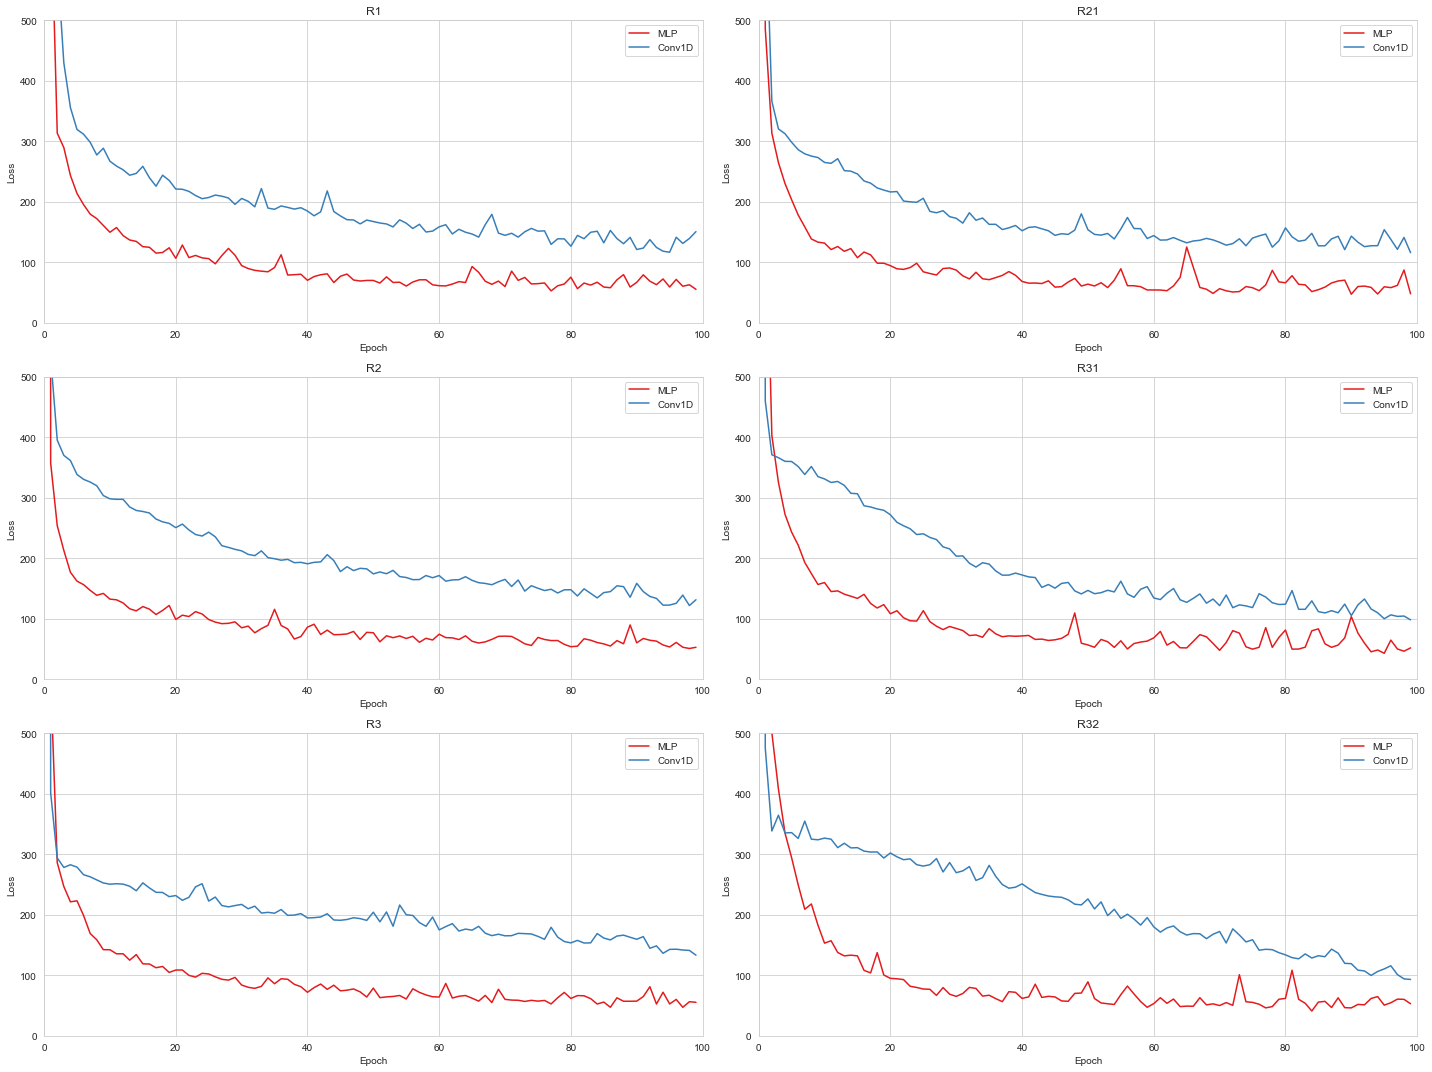

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

def draw_graph(ax, loss_mlp, loss_conv1d, title):
    ax.plot(loss_mlp, label='MLP')
    ax.plot(loss_conv1d, label='Conv1D')
    ax.legend()
    ax.set_xlabel('Epoch')
    ax.set_ylabel('Loss')
    ax.set_title(title)
    ax.set_ylim(0, 500)
    ax.set_xlim(0, num_epochs)

    
sns.set_style('whitegrid')
sns.set_palette('Set1')

fig, (ax1, ax2, ax3) = plt.subplots(3, 2, figsize=(20, 15))
draw_graph(ax1[0], losses_mlp1, losses_conv1d1, 'R1')
draw_graph(ax1[1], losses_mlp21, losses_conv1d21, 'R21')
draw_graph(ax2[0], losses_mlp2, losses_conv1d2, 'R2')
draw_graph(ax2[1], losses_mlp31, losses_conv1d31, 'R31')
draw_graph(ax3[0], losses_mlp3, losses_conv1d3, 'R3')
draw_graph(ax3[1], losses_mlp32, losses_conv1d32, 'R32')

plt.tight_layout()
plt.show()

In [8]:
import numpy
from sklearn.metrics import mean_squared_error, r2_score

def model_infer(model, loder) -> tuple:
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    y_pred = []
    y_true = []
    model.to(device)
    model.eval()
    with torch.no_grad():
        for X, y in loder:
            X = X.to(device)
            y = y.to(device)
            y_hat = model(X)
            y_pred.append(y_hat.cpu().numpy())
            y_true.append(y.cpu().numpy())
    y_pred = numpy.concatenate(y_pred)
    y_true = numpy.concatenate(y_true)
    rms = numpy.sqrt(mean_squared_error(y_true, y_pred.squeeze()))
    r2 = r2_score(y_true, y_pred.squeeze())
    return y_pred, y_true, rms, r2  

def append_graph(ax, y, y_pred, title):
    ax.scatter(y, y_pred, s=1, label=title)# 'MLP_L23'
    ax.plot([75, 200], [75, 200], 'k--')
    ax.set_xlabel('True')
    ax.set_ylabel('Pred')
    ax.set_title(f'{title} (RMS: {rms:.2f}, R2: {r2:.2f})')

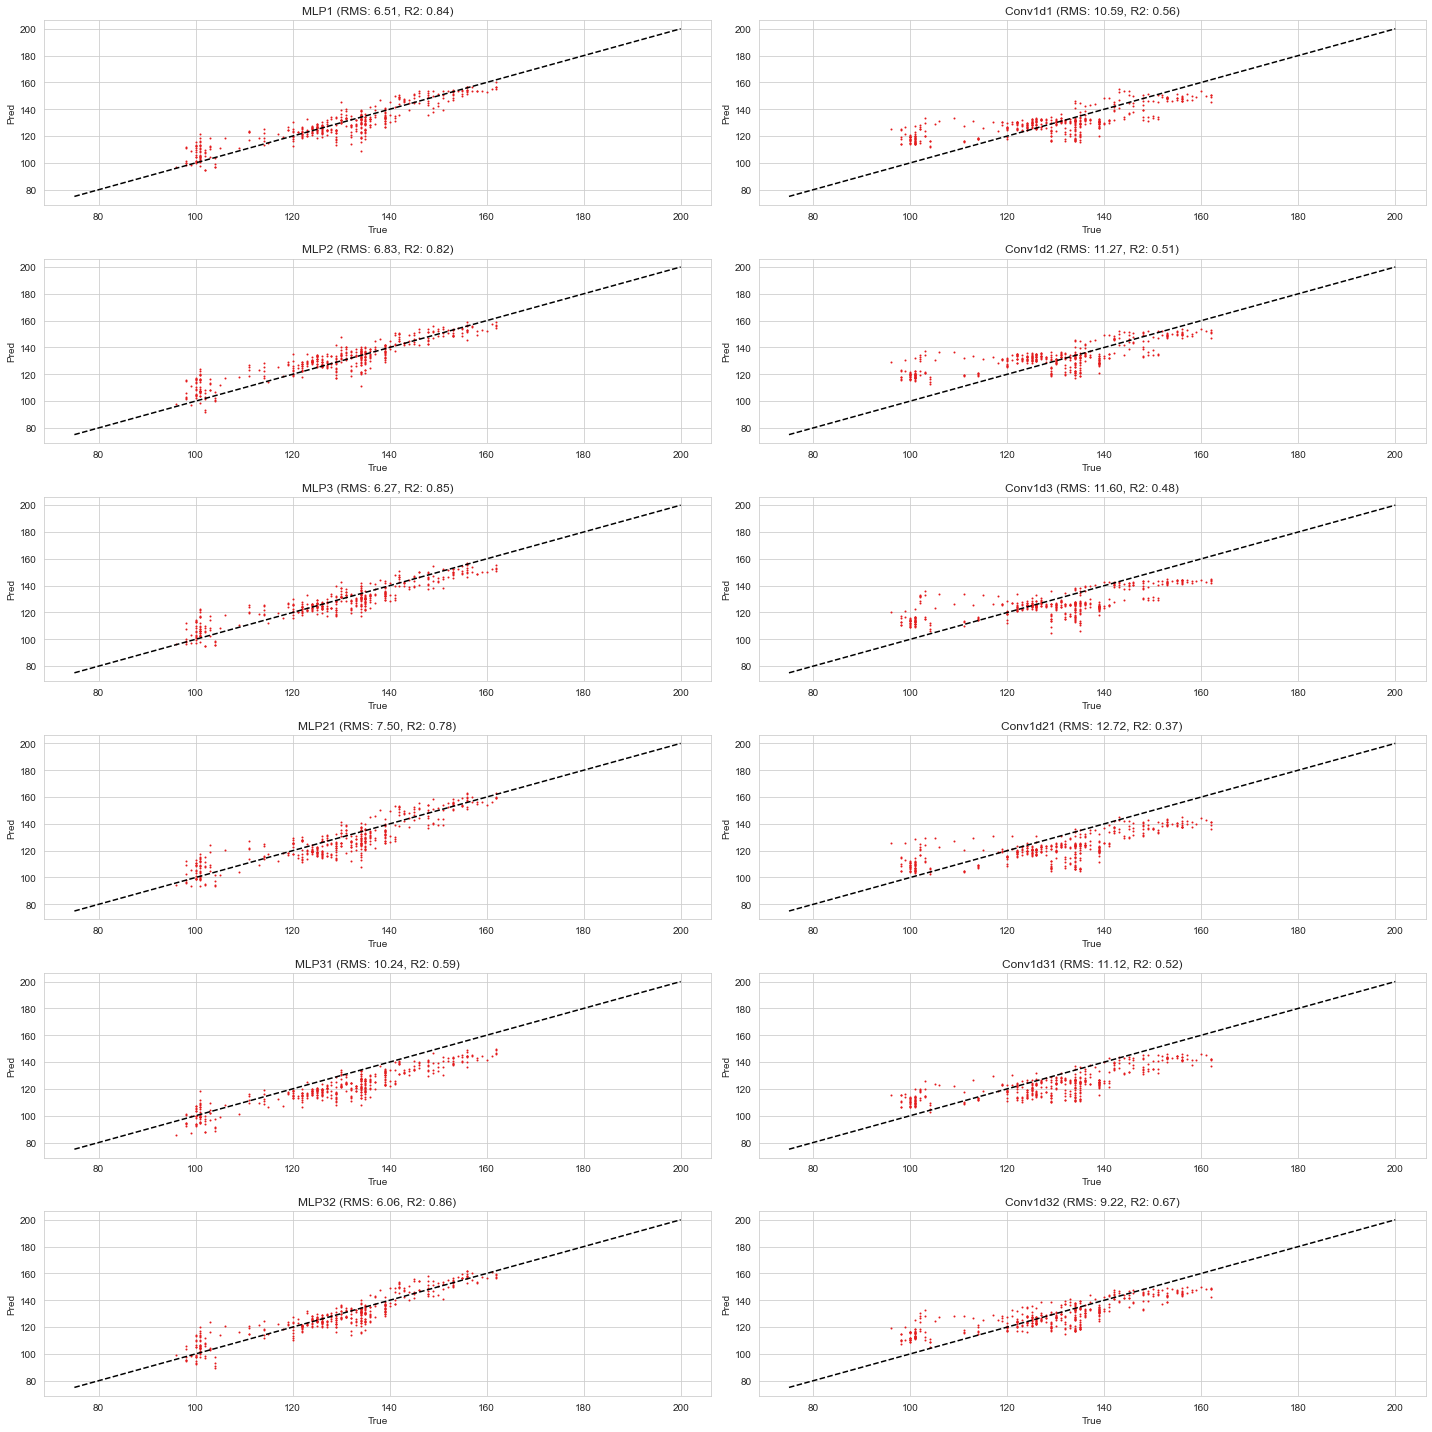

In [9]:
import numpy

sns.set_style('whitegrid')
sns.set_palette('Set1')

fig, (ax1, ax2, ax3, ax21, ax31, ax32) = plt.subplots(6, 2, figsize=(20, 20))

y_pred, y_true, rms, r2 = model_infer(model_mlp1, train_loader1)
append_graph(ax1[0], y_true, y_pred, 'MLP1')
y_pred, y_true, rms, r2 = model_infer(model_conv1d1, train_loader1)
append_graph(ax1[1], y_true, y_pred, 'Conv1d1')


y_pred, y_true, rms, r2 = model_infer(model_mlp2, train_loader2)
append_graph(ax2[0], y_true, y_pred, 'MLP2')
y_pred, y_true, rms, r2 = model_infer(model_conv1d2, train_loader2)
append_graph(ax2[1], y_true, y_pred, 'Conv1d2')


y_pred, y_true, rms, r2 = model_infer(model_mlp3, train_loader3)
append_graph(ax3[0], y_true, y_pred, 'MLP3')
y_pred, y_true, rms, r2 = model_infer(model_conv1d3, train_loader3)
append_graph(ax3[1], y_true, y_pred, 'Conv1d3')

y_pred, y_true, rms, r2 = model_infer(model_mlp21, train_loader21)
append_graph(ax21[0], y_true, y_pred, 'MLP21')
y_pred, y_true, rms, r2 = model_infer(model_conv1d21, train_loader21)
append_graph(ax21[1], y_true, y_pred, 'Conv1d21')

y_pred, y_true, rms, r2 = model_infer(model_mlp31, train_loader31)
append_graph(ax31[0], y_true, y_pred, 'MLP31')
y_pred, y_true, rms, r2 = model_infer(model_conv1d31, train_loader31)
append_graph(ax31[1], y_true, y_pred, 'Conv1d31')

y_pred, y_true, rms, r2 = model_infer(model_mlp32, train_loader32)
append_graph(ax32[0], y_true, y_pred, 'MLP32')
y_pred, y_true, rms, r2 = model_infer(model_conv1d32, train_loader32)
append_graph(ax32[1], y_true, y_pred, 'Conv1d32')

plt.tight_layout()
plt.show()

In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

RF1 = RandomForestClassifier(max_depth=20, n_estimators=100, random_state=0)
RF2 = RandomForestClassifier(max_depth=20, n_estimators=100, random_state=0)
RF3 = RandomForestClassifier(max_depth=20, n_estimators=100, random_state=0)
RF21 = RandomForestClassifier(max_depth=20, n_estimators=100, random_state=0)
RF31 = RandomForestClassifier(max_depth=20, n_estimators=100, random_state=0)
RF32 = RandomForestClassifier(max_depth=20, n_estimators=100, random_state=0)

GB1 = GradientBoostingClassifier(max_depth=10, n_estimators=100, random_state=0)
GB2 = GradientBoostingClassifier(max_depth=10, n_estimators=100, random_state=0)
GB3 = GradientBoostingClassifier(max_depth=10, n_estimators=100, random_state=0)
GB21 = GradientBoostingClassifier(max_depth=10, n_estimators=100, random_state=0)
GB31 = GradientBoostingClassifier(max_depth=10, n_estimators=100, random_state=0)
GB32 = GradientBoostingClassifier(max_depth=10, n_estimators=100, random_state=0)

In [11]:
num_epochs = 3

for epoch in tqdm(range(num_epochs), desc=f'Train {str}'):
    RF1.fit(data1[0], data1[1])
    RF2.fit(data2[0], data2[1])
    RF3.fit(data3[0], data3[1])
    RF21.fit(data21[0], data21[1])
    RF31.fit(data31[0], data31[1])
    RF32.fit(data32[0], data32[1])
    
    GB1.fit(data1[0], data1[1])
    GB2.fit(data2[0], data2[1])
    GB3.fit(data3[0], data3[1])
    GB21.fit(data21[0], data21[1])
    GB31.fit(data31[0], data31[1])
    GB32.fit(data32[0], data32[1])


Train <class 'str'>: 100%|██████████████████████████████████████████████████████████████| 3/3 [11:37<00:00, 232.44s/it]


In [12]:
print(RF1.score(data1[2], data1[3]))
print(RF2.score(data2[2], data2[3]))
print(RF3.score(data3[2], data3[3]))
print(RF21.score(data21[2], data21[3]))
print(RF31.score(data31[2], data31[3]))
print(RF32.score(data32[2], data32[3]))

print(GB1.score(data1[2], data1[3]))
print(GB2.score(data2[2], data2[3]))
print(GB3.score(data3[2], data3[3]))
print(GB21.score(data21[2], data21[3]))
print(GB31.score(data31[2], data31[3]))
print(GB32.score(data32[2], data32[3]))

0.30927835051546393
0.38144329896907214
0.422680412371134
0.3402061855670103
0.3711340206185567
0.3402061855670103
0.30927835051546393
0.26804123711340205
0.3711340206185567
0.21649484536082475
0.26804123711340205
0.27835051546391754


In [13]:
def make_result_sample(data, model, count):
    y_h = []; pred = []
    for i in range(0, count):
        y_h.append(data[3][i])
        
        result = model.predict([data[2][i].tolist()])
        pred.append(result)
    
    return y_h, pred

statistic_RF = pd.DataFrame(columns=["RF1_y","RF1_pred","RF2_y","RF2_pred","RF3_y","RF3_pred",
                                        "RF21_y","RF21_pred","RF31_y","RF31_pred","RF32_y","RF32_pred"])
statistic_GB = pd.DataFrame(columns=["GB1_y","GB1_pred","GB2_y","GB2_pred","GB3_y","GB3_pred",
                                        "GB21_y","GB21_pred","GB31_y","GB31_pred","GB32_y","GB32_pred"])

In [14]:
statistic_RF["RF1_y"], statistic_RF["RF1_pred"] = make_result_sample(data1, RF1, 5)
statistic_RF["RF2_y"], statistic_RF["RF2_pred"] = make_result_sample(data2, RF2, 5)
statistic_RF["RF3_y"], statistic_RF["RF3_pred"] = make_result_sample(data3, RF3, 5)
statistic_RF["RF21_y"], statistic_RF["RF21_pred"] = make_result_sample(data21, RF21, 5)
statistic_RF["RF31_y"], statistic_RF["RF31_pred"] = make_result_sample(data31, RF31, 5)
statistic_RF["RF32_y"], statistic_RF["RF32_pred"] = make_result_sample(data32, RF32, 5)

statistic_RF

,RF1_y,RF1_pred,RF2_y,RF2_pred,RF3_y,RF3_pred,RF21_y,RF21_pred,RF31_y,RF31_pred,RF32_y,RF32_pred
0,tensor(143.),[143.0],tensor(143.),[143.0],tensor(143.),[143.0],tensor(143.),[143.0],tensor(143.),[143.0],tensor(143.),[143.0]
1,tensor(142.),[149.0],tensor(142.),[146.0],tensor(142.),[146.0],tensor(142.),[146.0],tensor(142.),[146.0],tensor(142.),[142.0]
2,tensor(104.),[100.0],tensor(104.),[100.0],tensor(104.),[100.0],tensor(104.),[101.0],tensor(104.),[104.0],tensor(104.),[100.0]
3,tensor(101.),[101.0],tensor(101.),[101.0],tensor(101.),[101.0],tensor(101.),[101.0],tensor(101.),[101.0],tensor(101.),[101.0]
4,tensor(124.),[126.0],tensor(124.),[124.0],tensor(124.),[124.0],tensor(124.),[125.0],tensor(124.),[126.0],tensor(124.),[126.0]


In [15]:
statistic_GB["GB1_y"], statistic_GB["GB1_pred"] = make_result_sample(data1, GB1, 5)
statistic_GB["GB2_y"], statistic_GB["GB2_pred"] = make_result_sample(data2, GB2, 5)
statistic_GB["GB3_y"], statistic_GB["GB3_pred"] = make_result_sample(data3, GB3, 5)
statistic_GB["GB21_y"], statistic_GB["GB21_pred"] = make_result_sample(data21, GB21, 5)
statistic_GB["GB31_y"], statistic_GB["GB31_pred"] = make_result_sample(data31, GB31, 5)
statistic_GB["GB32_y"], statistic_GB["GB32_pred"] = make_result_sample(data32, GB32, 5)

statistic_GB

,GB1_y,GB1_pred,GB2_y,GB2_pred,GB3_y,GB3_pred,GB21_y,GB21_pred,GB31_y,GB31_pred,GB32_y,GB32_pred
0,tensor(143.),[143.0],tensor(143.),[143.0],tensor(143.),[143.0],tensor(143.),[143.0],tensor(143.),[143.0],tensor(143.),[143.0]
1,tensor(142.),[148.0],tensor(142.),[148.0],tensor(142.),[148.0],tensor(142.),[146.0],tensor(142.),[148.0],tensor(142.),[146.0]
2,tensor(104.),[103.0],tensor(104.),[103.0],tensor(104.),[103.0],tensor(104.),[100.0],tensor(104.),[114.0],tensor(104.),[100.0]
3,tensor(101.),[132.0],tensor(101.),[132.0],tensor(101.),[101.0],tensor(101.),[132.0],tensor(101.),[132.0],tensor(101.),[101.0]
4,tensor(124.),[126.0],tensor(124.),[134.0],tensor(124.),[124.0],tensor(124.),[134.0],tensor(124.),[122.0],tensor(124.),[134.0]


In [16]:
def model_infer(model, loder) -> tuple:
    y_pred = []
    y_true = []

    for X, y in loder:
        y_hat = model.predict(X.squeeze(0).tolist()) # model(X)
        y_hat = torch.Tensor(y_hat)
        y_pred.append(y_hat.cpu().numpy())
        y_true.append(y.cpu().numpy())
        
    y_pred = numpy.concatenate(y_pred)
    y_true = numpy.concatenate(y_true)
    rms = numpy.sqrt(mean_squared_error(y_true, y_pred.squeeze()))
    r2 = r2_score(y_true, y_pred.squeeze())
    return y_pred, y_true, rms, r2

def draw_DTgraph(ax, model, loader, title):
    y_pred, y_true, rms, r2 = model_infer(model, loader)
    ax.scatter(y_true, y_pred, s=1, label=title)
    ax.plot([75, 200], [75, 200], 'k--')
    ax.set_xlabel('True')
    ax.set_ylabel('Pred')
    ax.set_title(f'{title} (RMS: {rms:.2f}, R2: {r2:.2f})') # f'R31 RandomForest (RMS: {rms:.2f}, R2: {r2:.2f})'

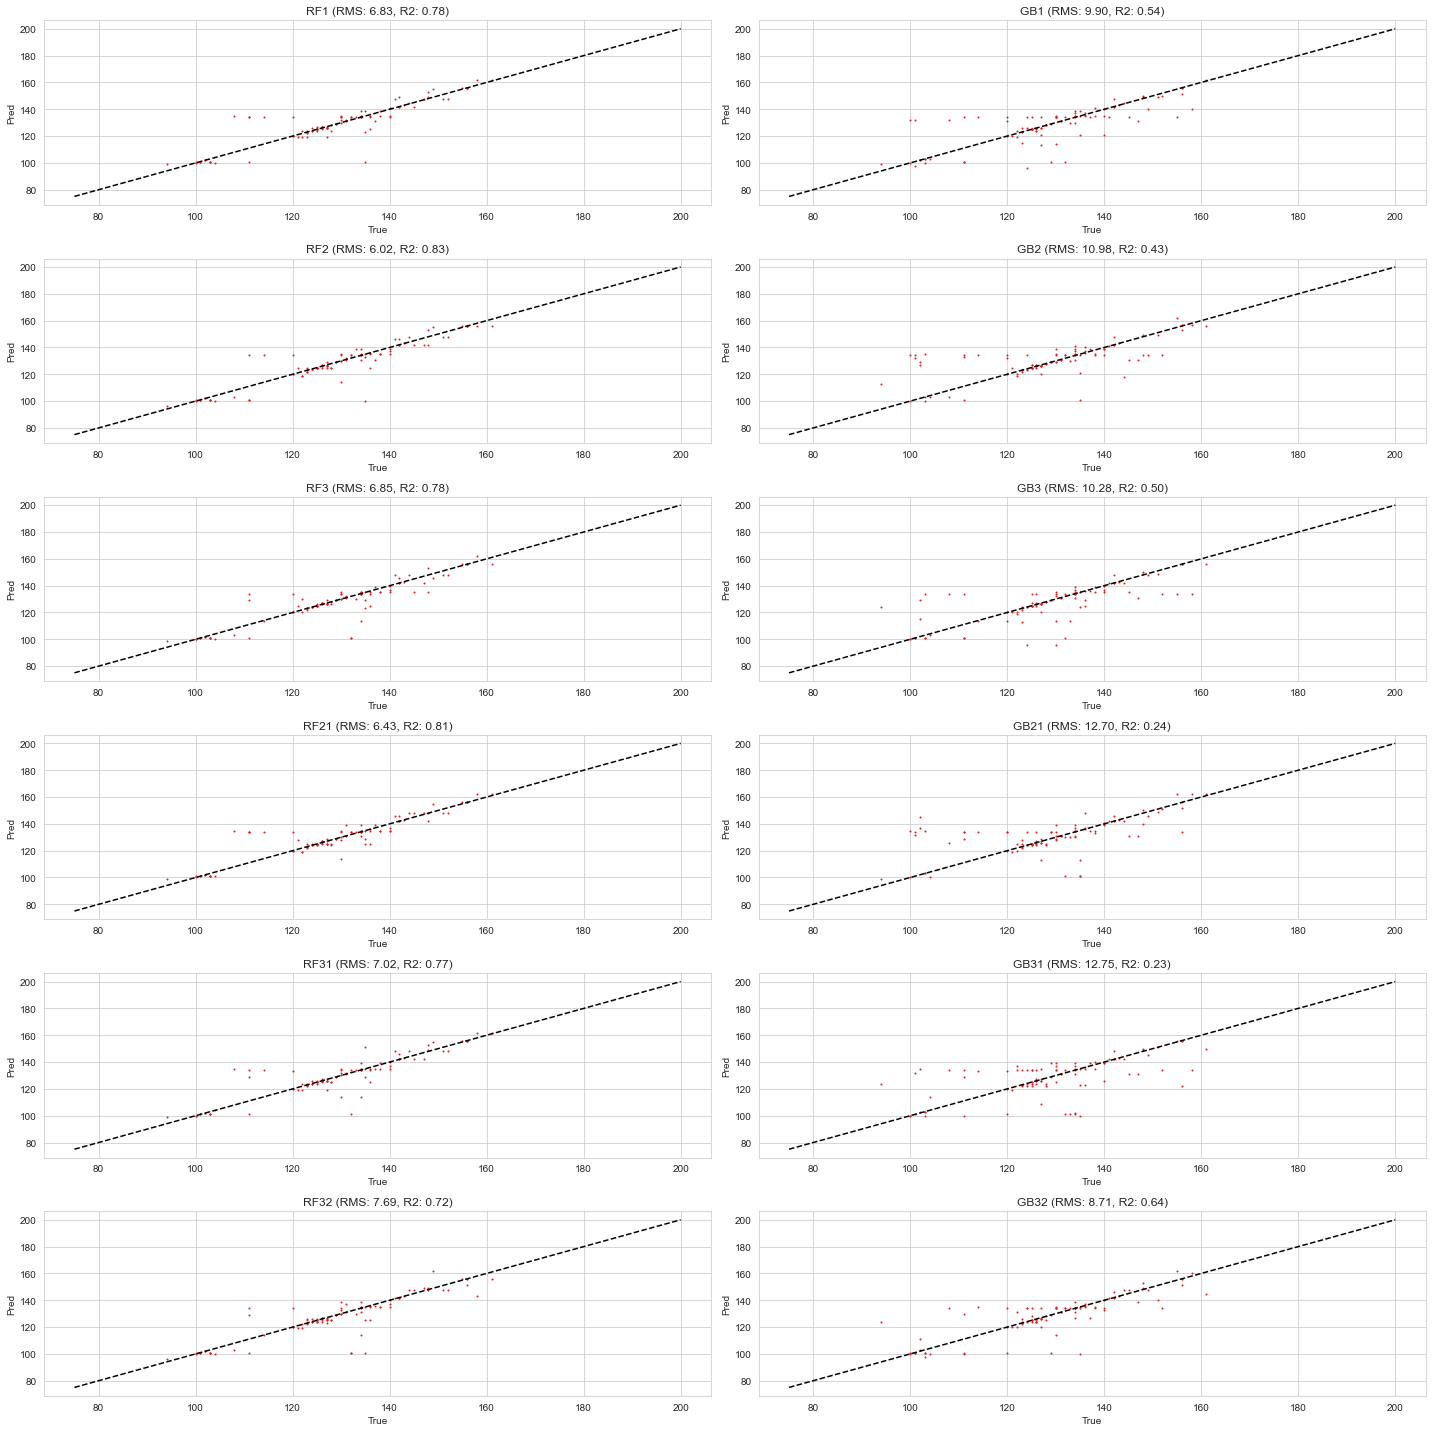

In [17]:
test_loader1 = DataLoader(TensorDataset(data1[2].unsqueeze(1), data1[3]), batch_size=1, shuffle=True)
test_loader2 = DataLoader(TensorDataset(data2[2].unsqueeze(1), data2[3]), batch_size=1, shuffle=True)
test_loader3 = DataLoader(TensorDataset(data3[2].unsqueeze(1), data3[3]), batch_size=1, shuffle=True)
test_loader21 = DataLoader(TensorDataset(data21[2].unsqueeze(1), data21[3]), batch_size=1, shuffle=True)
test_loader31 = DataLoader(TensorDataset(data31[2].unsqueeze(1), data31[3]), batch_size=1, shuffle=True)
test_loader32 = DataLoader(TensorDataset(data32[2].unsqueeze(1), data32[3]), batch_size=1, shuffle=True)

fig, (ax1, ax2, ax3, ax21, ax31, ax32) = plt.subplots(6, 2, figsize=(20, 20))
draw_DTgraph(ax1[0], RF1, test_loader1, 'RF1')
draw_DTgraph(ax1[1], GB1, test_loader1, 'GB1')
draw_DTgraph(ax2[0], RF2, test_loader2, 'RF2')
draw_DTgraph(ax2[1], GB2, test_loader2, 'GB2')
draw_DTgraph(ax3[0], RF3, test_loader3, 'RF3')
draw_DTgraph(ax3[1], GB3, test_loader3, 'GB3')

draw_DTgraph(ax21[0], RF21, test_loader21, 'RF21')
draw_DTgraph(ax21[1], GB21, test_loader21, 'GB21')
draw_DTgraph(ax31[0], RF31, test_loader31, 'RF31')
draw_DTgraph(ax31[1], GB31, test_loader31, 'GB31')
draw_DTgraph(ax32[0], RF32, test_loader32, 'RF32')
draw_DTgraph(ax32[1], GB32, test_loader32, 'GB32')

plt.tight_layout()
plt.show()

In [18]:
import joblib

joblib.dump(RF31, "property2/rf_test.joblib")
joblib.dump(GB31, "property2/gb_test.joblib")

['property2/gb_test.joblib']

In [19]:
model_RF = joblib.load("property2/rf_test.joblib")
model_GB = joblib.load("property2/gb_test.joblib")

In [20]:
print(model_RF.predict(data31[2][0:10]))
print(data31[3][0:10])

[143. 146. 104. 101. 126. 125. 140. 119. 149. 114.]
tensor([143., 142., 104., 101., 124., 125., 140., 121., 148., 130.])
